In [1]:
#Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing USA housing data
data=pd.read_csv('/Users/sujalagrawal/Developer/Algosense/week2/data/USA_Housing.csv')

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
data.drop(['Address'],axis=1,inplace=True)

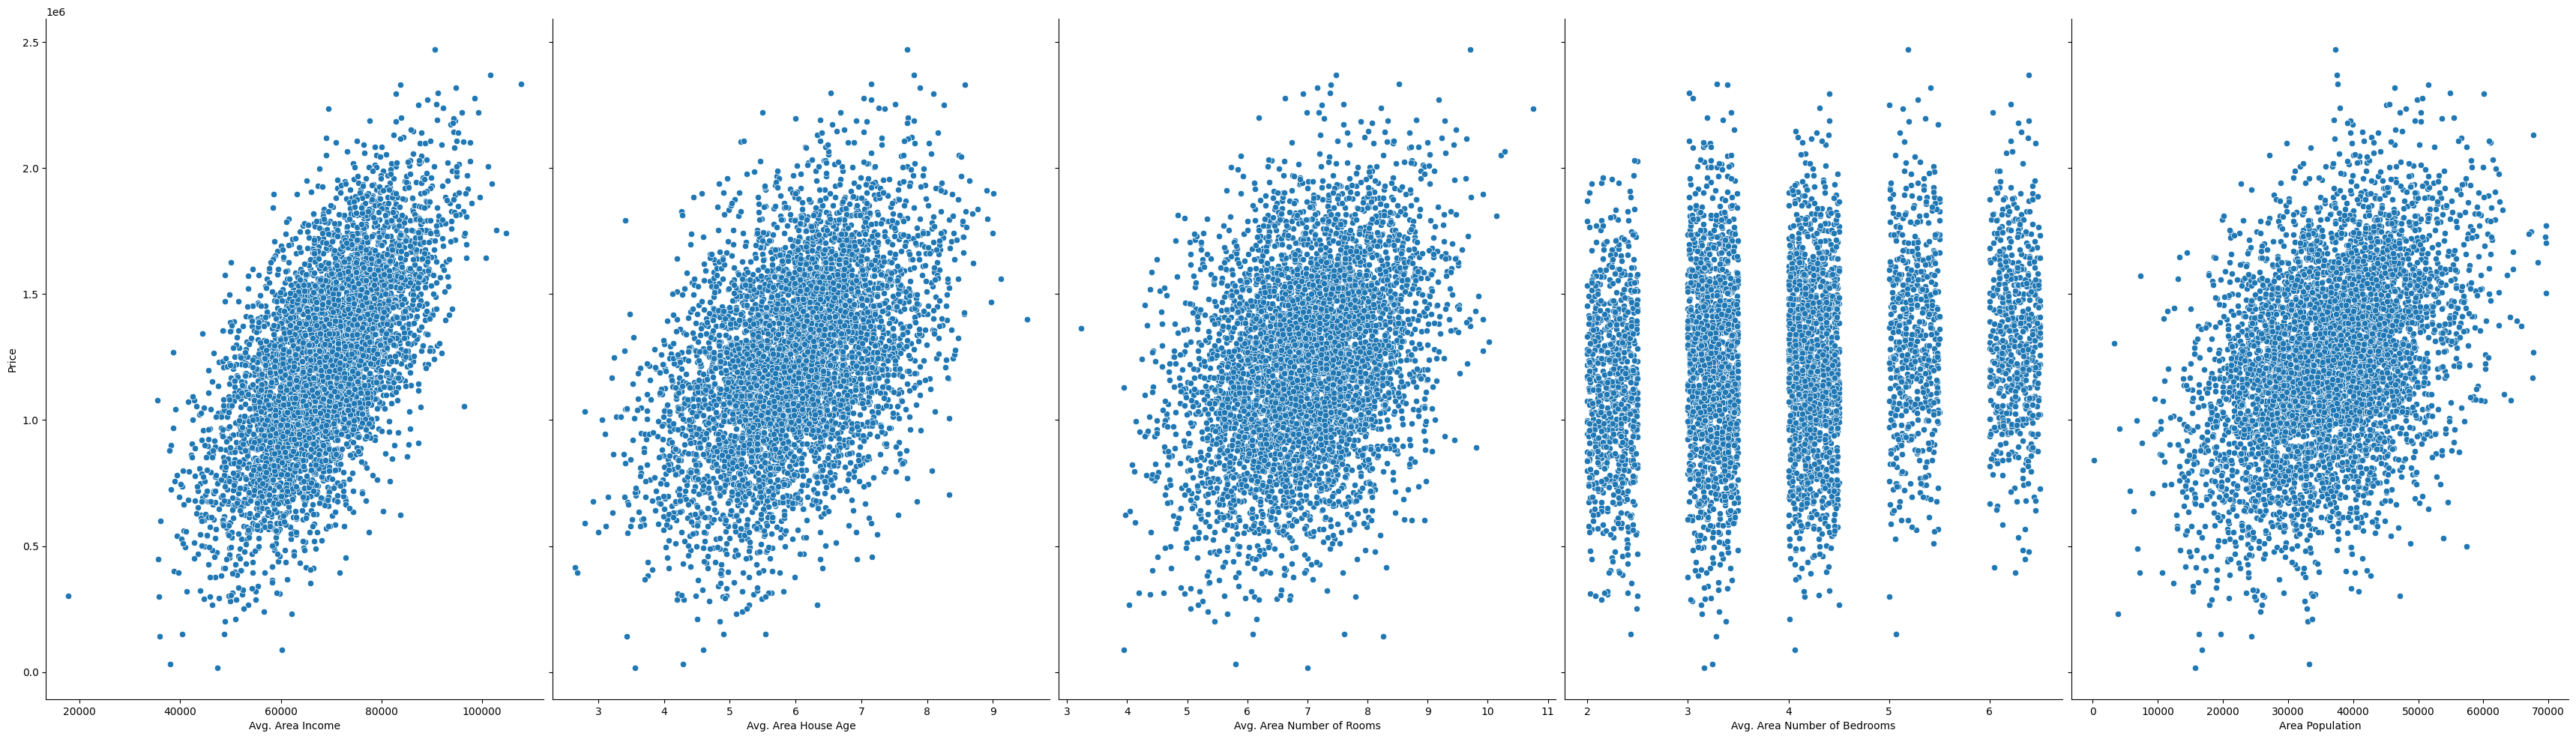

In [6]:
data.head()
sns.pairplot(data,x_vars=list(data)[0:5],y_vars='Price',height=10,aspect=0.7)


<Axes: >

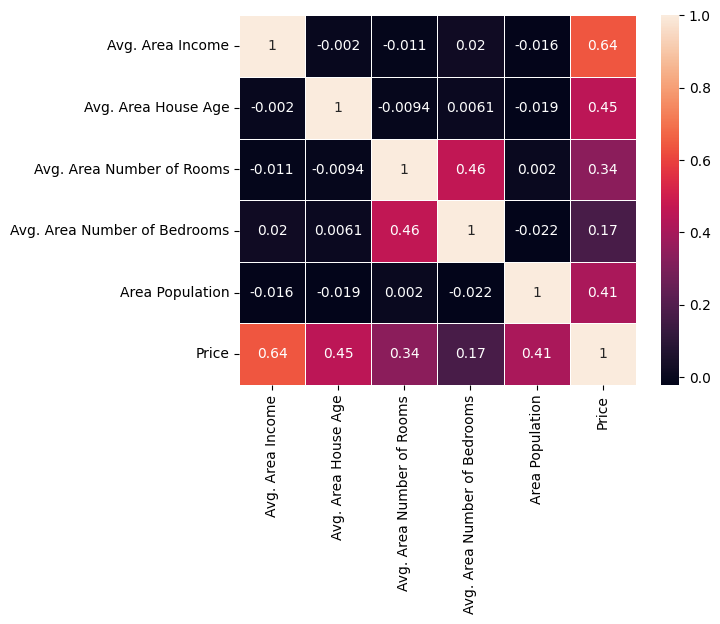

In [7]:
sns.heatmap(data.corr(),annot=True,linewidth=.5)

In [8]:
data.corr().Price.sort_values()

Avg. Area Number of Bedrooms    0.171071
Avg. Area Number of Rooms       0.335664
Area Population                 0.408556
Avg. Area House Age             0.452543
Avg. Area Income                0.639734
Price                           1.000000
Name: Price, dtype: float64

In [9]:
from sklearn import preprocessing
pre_process=preprocessing.StandardScaler()

In [10]:
X=data[list(data)[0:5]]
y=data['Price']
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [11]:
X = pd.DataFrame(pre_process.fit_transform(X))
X.head()

,0,1,2,3,4
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [12]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=5)


In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3750, 5)
(1250, 5)
(3750,)
(1250,)


In [15]:
#linear regression from scratch
class LinearRegression() :   
    def __init__( self, learning_rate, iterations ) :  
        self.learning_rate = learning_rate  
        self.iterations = iterations
        
    def fit( self, X, Y ) : 
        self.m, self.n = X.shape 
        self.W = np.zeros( self.n )   
        self.b = 0  
        self.X = X 
        self.Y = Y 
        for i in range( self.iterations ) :     
            self.update_weights()             
        return self
        
    def update_weights( self ) :      
        Y_pred = self.predict( self.X ) 
        dW =  ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m 
        db =  2 * np.sum( self.Y - Y_pred ) / self.m  
        self.W = self.W + self.learning_rate * dW 
        self.b = self.b + self.learning_rate * db 
        return self
    def coeff(self):
        return(self.W)
    def intercept(self):
        return(self.b)
    def predict( self, X ) : 
        return X.dot( self.W ) + self.b 
     

In [16]:
lm = LinearRegression( iterations = 10000, learning_rate = 0.01 ) 
lm.fit(X_train, y_train)
print(lm.coeff())
print(lm.intercept())


0    231001.434231
1    164874.444577
2    123103.560635
3      1137.612414
4    151843.984984
dtype: float64
1231864.832609144


In [17]:
y_pred = lm.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [18]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 10839453266.597046
r_square_value : 0.904761663383596


In [19]:
from math import sqrt
rms = sqrt(mse)
rms


104112.69503089931

Text(0, 0.5, 'Housing Price')

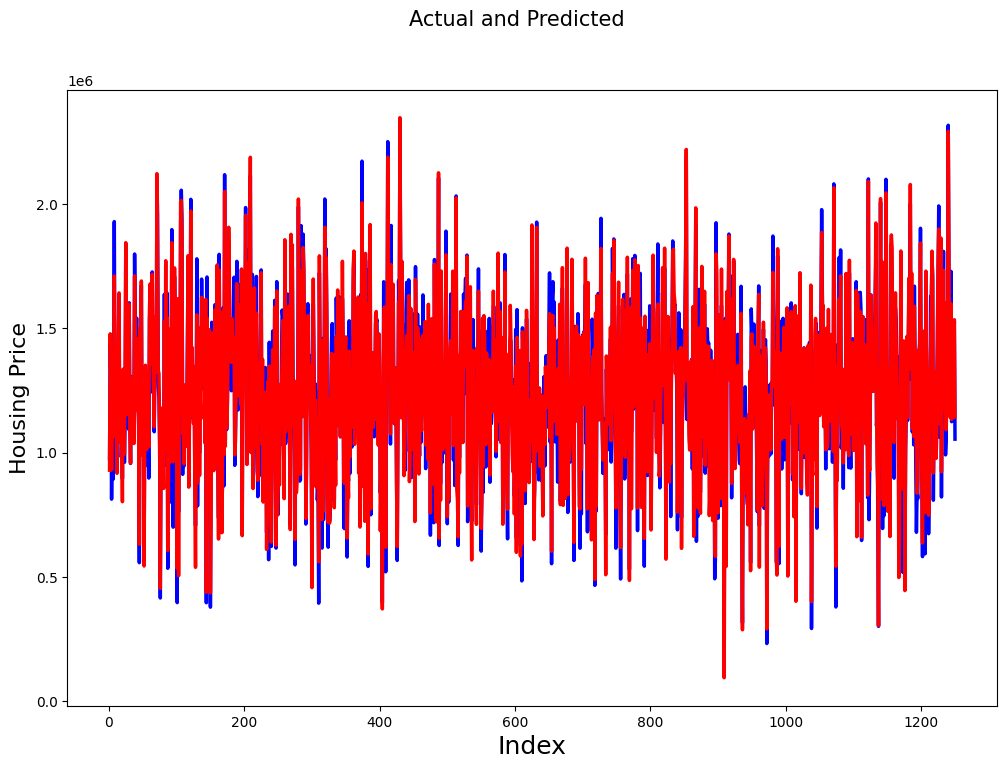

In [20]:
# Actual and Predicted
c = [i for i in range(1,1251,1)] # generating index 
fig = plt.figure(figsize=(12,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)     